### Sigmoid函数

In [ ]:
from sklearn.linear_model import LogisticRegression

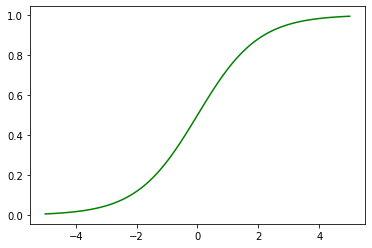

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))


x = np.linspace(-5,5,100)
y = sigmoid(x)
plt.plot(x,y,color = 'green')

### 逻辑回归公式立体化

#### 建模训练

In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale # 数据标准化Z-score

In [3]:
# 1、加载乳腺癌数据
data = datasets.load_breast_cancer()
X, y = scale(data['data'][:, :2]), data['target']

# 2、求出两个维度对应的数据在逻辑回归算法下的最优解
lr = LogisticRegression()
lr.fit(X, y)
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
# 3、分别把两个维度所对应的参数W1和W2取出来
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
print(w1, w2,lr.intercept_)

-3.3373102846154525 -0.8771414036339871 [0.69962639]


In [6]:
# 4、已知w1和w2的情况下，传进来数据的X，返回数据的y_predict
def sigmoid(X, w1, w2):
    z = w1*X[0] + w2*X[1]
    return 1 / (1 + np.exp(-z))

# 5、传入一份已知数据的X，y，如果已知w1和w2的情况下，计算对应这份数据的Loss损失
def loss_function(X, y, w1, w2):
    loss = 0
    # 遍历数据集中的每一条样本，并且计算每条样本的损失，加到loss身上得到整体的数据集损失
    for x_i, y_i in zip(X, y):
        # 这是计算一条样本的y_predict，即概率
        p = sigmoid(x_i, w1, w2)
        loss += -1*y_i*np.log(p)-(1-y_i)*np.log(1-p)
    return loss

In [7]:
# 6、参数w1和w2取值空间
w1_space = np.linspace(w1-2, w1+2, 100)
w2_space = np.linspace(w2-2, w2+2, 100)

# 固定了w2，最优解，w1变化时，损失，怎么变的
loss1_ = np.array([loss_function(X, y, i, w2) for i in w1_space])

# 固定了w1，最优解，w2变化时，损失，怎么变的
loss2_ = np.array([loss_function(X, y, w1, i) for i in w2_space])

#### 线性可视化【单一系数】

Text(0.5, 0, '$w_2$')

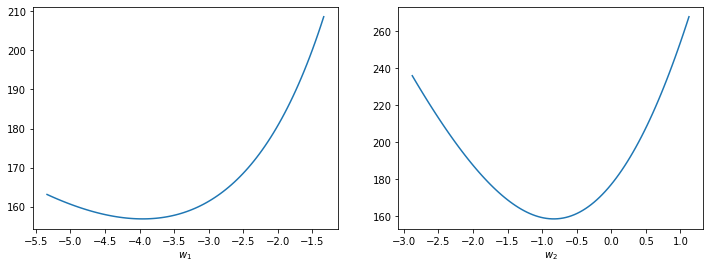

In [11]:
# 7、数据可视化
fig1 = plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.plot(w1_space, loss1_)
plt.xlabel('$w_1$')

plt.subplot(2, 2, 2)
plt.plot(w2_space, loss2_)
plt.xlabel('$w_2$')

#### 等高线【二维系数】

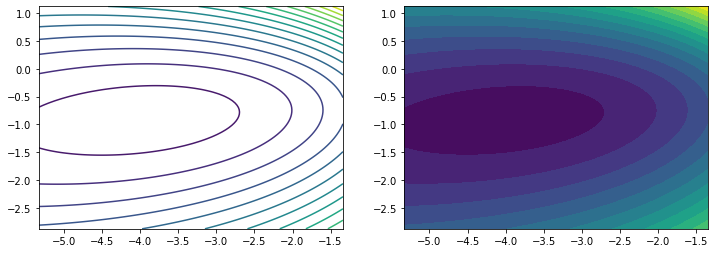

In [14]:
# 颜色越深，就是越是谷底，越深
plt.figure(figsize=(12,9))
plt.subplot(2, 2, 3)
w1_grid, w2_grid = np.meshgrid(w1_space, w2_space) # 二维
loss_grid = loss_function(X, y, w1_grid, w2_grid)

plt.contour(w1_grid, w2_grid, loss_grid,20) # 等高线

plt.subplot(2, 2, 4)
plt.contourf(w1_grid, w2_grid, loss_grid,20) # 等高面

In [15]:
print(w1,w2)

-3.3373102846154525 -0.8771414036339871


#### 3D立体化

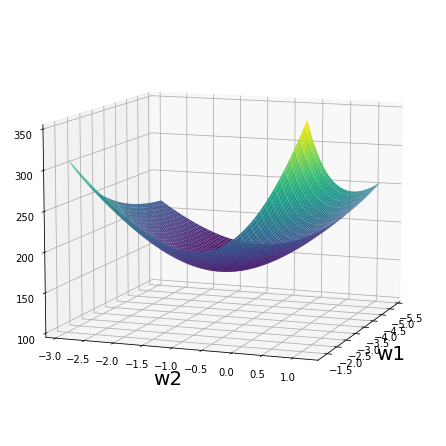

In [16]:
# 8、3D立体可视化
fig2 = plt.figure(figsize=(12,6))
ax = Axes3D(fig2,auto_add_to_figure=False)
fig2.add_axes(ax)

ax.plot_surface(w1_grid, w2_grid, loss_grid,cmap = 'viridis')

plt.xlabel('w1',fontsize = 20)
plt.ylabel('w2',fontsize = 20)
ax.set_zlim(100,350)
ax.view_init(elev = 10 ,azim = 20,vertical_axis = 'z')

### 逻辑斯蒂回归-实战

#### 建模概率计算

In [58]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1、数据加载
iris = datasets.load_iris()

# 2、数据提取与筛选
X = iris['data']
y = iris['target']
cond = y != 2 # 筛选出来 0 和 1
X = X[cond]
y = y[cond]

# 3、数据拆分
X_train,X_test,y_train,y_test = train_test_split(X,y)
display(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test) # predict 分类结果输出？？？
# 概率 判断
print('算法预测结果是：',y_pred)
print('真实的类别是：',y_test)
print(model.score(X_test,y_test))

算法预测结果是： [0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1]
真实的类别是： [0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1]
1.0


逻辑斯蒂回归，根据概率大小进行类别的划分的

In [60]:
p_ = model.predict_proba(X_test)
p_

array([[0.98068583, 0.01931417],
       [0.00380683, 0.99619317],
       [0.98497029, 0.01502971],
       [0.97517515, 0.02482485],
       [0.00152629, 0.99847371],
       [0.01595337, 0.98404663],
       [0.97169904, 0.02830096],
       [0.13932315, 0.86067685],
       [0.95475296, 0.04524704],
       [0.0204699 , 0.9795301 ],
       [0.95702431, 0.04297569],
       [0.97986205, 0.02013795],
       [0.95620072, 0.04379928],
       [0.0109658 , 0.9890342 ],
       [0.97888905, 0.02111095],
       [0.98173421, 0.01826579],
       [0.00225069, 0.99774931],
       [0.9753805 , 0.0246195 ],
       [0.0179583 , 0.9820417 ],
       [0.98165287, 0.01834713],
       [0.01842416, 0.98157584],
       [0.97509212, 0.02490788],
       [0.00514084, 0.99485916],
       [0.00869738, 0.99130262],
       [0.0040398 , 0.9959602 ]])

In [25]:
(p_[:,1] >= 0.5) * 1

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0])

In [28]:
(p_[:,0] < 0.5) * 1

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0])

#### 根据公式手动计算

<font size = 8>$z = -\theta^Tx$</font>

In [66]:
# 线性回归方程
b = model.intercept_
w = model.coef_
print(b,w)
# 逻辑回归函数，z表示线性回归方程
def sigmoid(z):
    return 1/(1 + np.exp(-z))
# 线性方程 乘法
z = X_test.dot(w.T) + b
proba_ = sigmoid(z) # 类别 1 的概率，neg（阴性）False = 0 pos（阳性） True = 1
proba_
proba_ = np.c_[1 - proba_,proba_]
proba_[:5]

[-6.52697894] [[ 0.46589808 -0.83505818  2.16970169  0.90912548]]


array([[0.98068583, 0.01931417],
       [0.00380683, 0.99619317],
       [0.98497029, 0.01502971],
       [0.97517515, 0.02482485],
       [0.00152629, 0.99847371]])

In [67]:
p_[:5]

array([[0.98068583, 0.01931417],
       [0.00380683, 0.99619317],
       [0.98497029, 0.01502971],
       [0.97517515, 0.02482485],
       [0.00152629, 0.99847371]])

In [34]:
w.T

array([[ 0.41896488],
       [-0.82995651],
       [ 2.16243852],
       [ 0.89219541]])

In [32]:
X_test

array([[4.6, 3.2, 1.4, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [6.4, 2.9, 4.3, 1.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 3. , 4.1, 1.3],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 2.4, 3.8, 1.1],
       [4.8, 3.1, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.4, 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [6.1, 3. , 4.6, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [4.9, 2.4, 3.3, 1. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.1, 2.9, 4.7, 1.4],
       [6.7, 3.1, 4.7, 1.5],
       [4.9, 3. , 1.4, 0.2],
       [5.7, 2.9, 4.2, 1.3],
       [6.1, 2.8, 4. , 1.3],
       [5.1, 3.8, 1.9, 0.4]])

### 逻辑斯蒂回归多分类

#### 建模概率计算

In [69]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1、数据加载
iris = datasets.load_iris()

# 2、数据提取
X = iris['data']
y = iris['target']

# 3、数据拆分
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [70]:
#'auto', 'ovr', 'multinomial'
model = LogisticRegression(multi_class= 'ovr')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print('模型预测结果：',y_pred)
print('真实的结果是：',y_test)
print('模型准确率是：',model.score(X_test,y_test))

p_ = model.predict_proba(X_test)
p_[:5]

模型预测结果： [0 2 2 2 1 1 0 0 0 2 0 2 0 2 0 2 2 2 1 2 1 0 2 2 0 0 0 1 0 2 2 0 1 2 1 1 1
 1]
真实的结果是： [0 2 2 2 1 1 0 0 0 2 0 2 0 2 0 2 2 2 1 2 1 0 2 2 0 0 0 1 0 2 2 0 1 2 1 2 1
 1]
模型准确率是： 0.9736842105263158


array([[8.57387323e-01, 1.42607760e-01, 4.91738279e-06],
       [8.88607105e-06, 3.99441819e-01, 6.00549295e-01],
       [6.65568042e-04, 2.24998818e-01, 7.74335614e-01],
       [7.10478912e-04, 3.20763870e-01, 6.78525651e-01],
       [1.36803440e-02, 8.46818623e-01, 1.39501033e-01]])

In [71]:
p_.argmax(axis = 1)

array([0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1], dtype=int64)

#### 根据公式手动计算

In [74]:
np.set_printoptions(suppress=True)

In [75]:
# 线性回归方程，3个方程
b = model.intercept_
w = model.coef_
# 逻辑回归函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

print('模型斜率：\n',w)
print('模型截距：',b)

# 线性方程 乘法
z = X_test.dot(w.T) + b
proba_ = sigmoid(z)
proba_ = proba_/proba_.sum(axis = 1).reshape(-1,1) # 归一化，概率之和等于1
print('算法求的的概率是：\n',p_[:5])
print('根据公式手动计算:\n',proba_[:5])

模型斜率：
 [[-0.46617417  0.84982621 -2.18058066 -0.91113264]
 [-0.11542054 -1.93254926  0.65535015 -1.0884815 ]
 [-0.3313544  -0.44487949  2.64741631  2.09324369]]
模型截距： [  6.5132325    4.74895864 -13.28384904]
算法求的的概率是：
 [[0.85738732 0.14260776 0.00000492]
 [0.00000889 0.39944182 0.6005493 ]
 [0.00066557 0.22499882 0.77433561]
 [0.00071048 0.32076387 0.67852565]
 [0.01368034 0.84681862 0.13950103]]
根据公式手动计算:
 [[0.85738732 0.14260776 0.00000492]
 [0.00000889 0.39944182 0.6005493 ]
 [0.00066557 0.22499882 0.77433561]
 [0.00071048 0.32076387 0.67852565]
 [0.01368034 0.84681862 0.13950103]]


In [76]:
proba_.sum(axis = 1).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

### 逻辑斯蒂回归softmax多分类

#### softmax概率公式

In [79]:
import numpy as np
x = np.array([3,1,-3])

def softmax(x):
    return np.e**x /np.sum(np.e**x)


softmax(x).round(2)



array([0.88, 0.12, 0.  ])

#### softmax建模概率实战

In [80]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# 1、数据加载
iris = datasets.load_iris()
# 2、数据提取
X = iris['data']
y = iris['target']
# 3、数据拆分
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [82]:
# 'auto', 'ovr', 'multinomial'
model = LogisticRegression(multi_class='multinomial',max_iter=5000) # 多项式，softmax
model.fit(X_train,y_train)
print('算法预测结果：\n',model.predict(X_test))
print('真实的分类是：\n',y_test)
print('准确率是：',model.score(X_test,y_test))

算法预测结果：
 [2 2 2 1 0 1 1 1 2 2 0 1 1 2 2 1 2 0 2 1 0 2 2 2 1 2 0 2 0 0 2 1 1 2 1 2 1
 2]
真实的分类是：
 [2 2 2 1 0 2 1 1 2 2 0 1 1 2 2 1 2 0 2 1 0 2 2 2 1 2 0 2 0 0 2 1 1 2 1 2 1
 2]
准确率是： 0.9736842105263158


In [83]:
p_ = model.predict_proba(X_test)
p_[:5]

array([[0.00014561, 0.18783253, 0.81202186],
       [0.00046424, 0.23971966, 0.7598161 ],
       [0.00003046, 0.03357013, 0.96639941],
       [0.01049329, 0.89586605, 0.09364066],
       [0.98262021, 0.01737962, 0.00000017]])

#### 根据公式手动计算验证

In [84]:
w = model.coef_
b = model.intercept_
print(w)
print(b)

[[-0.40690969  0.86660589 -2.29027567 -0.9979336 ]
 [ 0.44924411 -0.36146589 -0.02818818 -0.88040248]
 [-0.04233442 -0.50514     2.31846386  1.87833608]]
[  9.0476334    1.88460671 -10.93224011]


In [86]:
z = X_test.dot(w.T) + b
z

array([[ -5.26290705,   1.89946528,   3.36344177],
       [ -4.54908668,   1.6977402 ,   2.85134648],
       [ -5.79002204,   1.2150408 ,   4.57498124],
       [ -2.21192787,   2.23512701,  -0.02319915],
       [  6.53070278,   2.49577825,  -9.02648103],
       [ -4.26670749,   2.23837665,   2.02833084],
       [ -2.51247289,   2.40862868,   0.10384421],
       [ -2.10754868,   2.35593669,  -0.24838802],
       [ -4.54908668,   1.6977402 ,   2.85134648],
       [ -6.16259137,   2.4626312 ,   3.69996017],
       [  7.80576764,   2.44558372, -10.25135136],
       [ -1.67506626,   2.13413346,  -0.45906719],
       [ -3.79281641,   2.40512099,   1.38769542],
       [ -8.65654259,   2.17957706,   6.47696553],
       [ -6.47651475,   1.61991883,   4.85659591],
       [ -1.09434823,   2.41833235,  -1.32398413],
       [ -4.19469303,   2.01604014,   2.17865289],
       [  6.83830627,   2.76423008,  -9.60253636],
       [ -4.02278238,   1.48934217,   2.5334402 ],
       [ -1.48227155,   2.19450

In [89]:
def softmax(z):
    return np.exp(z)/np.exp(z).sum(axis = 1).reshape(-1,1)
proba_ = softmax(z)
print('算法求解的概率是：\n',p_[:5])
print('根据公式手写代码：\n',proba_[:5])

算法求解的概率是：
 [[0.00014561 0.18783253 0.81202186]
 [0.00046424 0.23971966 0.7598161 ]
 [0.00003046 0.03357013 0.96639941]
 [0.01049329 0.89586605 0.09364066]
 [0.98262021 0.01737962 0.00000017]]
根据公式手写代码：
 [[0.00014561 0.18783253 0.81202186]
 [0.00046424 0.23971966 0.7598161 ]
 [0.00003046 0.03357013 0.96639941]
 [0.01049329 0.89586605 0.09364066]
 [0.98262021 0.01737962 0.00000017]]


In [90]:
proba_.argmax(axis = 1)

array([2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2], dtype=int64)

In [91]:
model.predict(X_test)

array([2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2])